<a href="https://colab.research.google.com/github/farukh20/ML_ANN/blob/main/annproject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [28]:
!pip install tensorflow

In [29]:
import tensorflow as tf
print(tf.__version__)

2.17.0


In [30]:
#importing basic libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [31]:
##read dataset
dataset=pd.read_csv('Churn_Modelling.csv')

In [32]:
dataset.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [33]:
## divide dataset into independent & dependent feature
X=dataset.iloc[:,3:13]
y=dataset.iloc[:,13]

In [34]:
X.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10


In [35]:
y.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [36]:
## Feature Engineering

## Convert categorical feature into numerical
geography=pd.get_dummies(X['Geography'],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)
#geography.head()

In [37]:
## concatenate these variables with dataframe
X=X.drop(['Geography','Gender'], axis=1)

In [38]:
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,42,2,0.00,1,1,1,101348.88
1,608,41,1,83807.86,1,0,1,112542.58
2,502,42,8,159660.80,3,1,0,113931.57
3,699,39,1,0.00,2,0,0,93826.63
4,850,43,2,125510.82,1,1,1,79084.10


In [41]:
X=pd.concat([X,geography,gender],axis=1)
X.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Germany,Spain,Male,Germany,Spain,Male
0,619,42,2,0.00,1,1,1,101348.88,False,False,False,False,False,False
1,608,41,1,83807.86,1,0,1,112542.58,False,True,False,False,True,False
2,502,42,8,159660.80,3,1,0,113931.57,False,False,False,False,False,False
3,699,39,1,0.00,2,0,0,93826.63,False,False,False,False,False,False
4,850,43,2,125510.82,1,1,1,79084.10,False,True,False,False,True,False


In [42]:
## splitting the dataset into trainning set and test set
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)

In [45]:
## feature scaling

from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
sc = StandardScaler()

# Fit and transform the training data to avoid data leakage
X_train = sc.fit_transform(X_train)

# Transform the test data
X_test = sc.transform(X_test)


In [46]:
X_train

array([[ 0.16958176, -0.46460796,  0.00666099, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-2.30455945,  0.30102557, -1.37744033, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-1.19119591, -0.94312892, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       ...,
       [ 0.9015152 , -0.36890377,  0.00666099, ..., -0.5698444 ,
        -0.57369368,  0.91601335],
       [-0.62420521, -0.08179119,  1.39076231, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       [-0.28401079,  0.87525072, -1.37744033, ...,  1.75486502,
        -0.57369368, -1.09168714]])

In [47]:
X_test

array([[-0.55204276, -0.36890377,  1.04473698, ...,  1.75486502,
        -0.57369368, -1.09168714],
       [-1.31490297,  0.10961719, -1.031415  , ..., -0.5698444 ,
        -0.57369368, -1.09168714],
       [ 0.57162971,  0.30102557,  1.04473698, ..., -0.5698444 ,
         1.74309049, -1.09168714],
       ...,
       [-0.74791227, -0.27319958, -1.37744033, ..., -0.5698444 ,
         1.74309049,  0.91601335],
       [-0.00566991, -0.46460796, -0.33936434, ...,  1.75486502,
        -0.57369368,  0.91601335],
       [-0.79945688, -0.84742473,  1.04473698, ...,  1.75486502,
        -0.57369368,  0.91601335]])

In [48]:
X_train.shape

(8000, 14)

In [49]:
## Lets create the ANN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU,ReLU
from tensorflow.keras.layers import Dropout


In [50]:
## lets initialize the ANN
classifier=Sequential()

In [51]:
## adding the input layer
classifier.add(Dense(units=11,activation='relu'))
#classifier.add(Dropout(0.2)) #randomly select 80% input layer

## adding the first hidden layer
classifier.add(Dense(units=7,activation='relu'))

## adding the second hidden layer
classifier.add(Dense(units=6,activation='relu'))

## adding the output layer
classifier.add(Dense(units=1,activation='sigmoid'))

In [52]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


In [53]:
## adam uses default learning rate = 0.01
import tensorflow
opt=tensorflow.keras.optimizers.Adam(learning_rate=0.001)
## 'adam'=opt

In [54]:
## early stopping
import tensorflow as tf
early_stopping=tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [55]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=1000,callbacks=early_stopping)

Epoch 1/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.5124 - loss: 0.7563 - val_accuracy: 0.7970 - val_loss: 0.5915
Epoch 2/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8025 - loss: 0.5728 - val_accuracy: 0.8039 - val_loss: 0.5320
Epoch 3/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8107 - loss: 0.5179 - val_accuracy: 0.8148 - val_loss: 0.4898
Epoch 4/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8243 - loss: 0.4712 - val_accuracy: 0.8213 - val_loss: 0.4624
Epoch 5/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8231 - loss: 0.4565 - val_accuracy: 0.8285 - val_loss: 0.4400
Epoch 6/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8391 - loss: 0.4256 - val_accuracy: 0.8379 - val_loss: 0.4128
Epoch 7/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8505 - loss: 0.3945 - val_accuracy: 0.8478 - val_loss: 0.3940
Epoch 8/1000
536/536 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8544 - loss: 0.3732 - 

In [56]:
model_history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

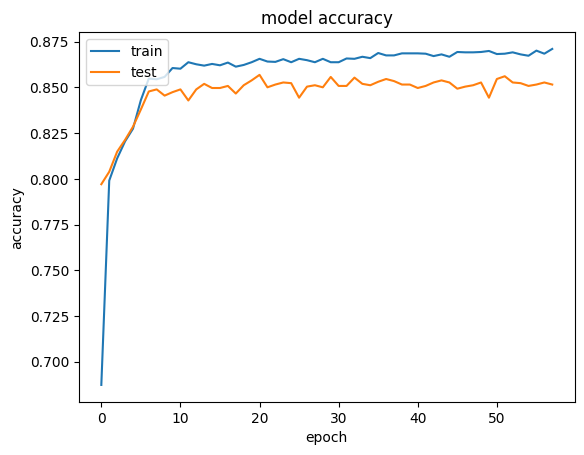

In [57]:
## plot accuracy summary
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

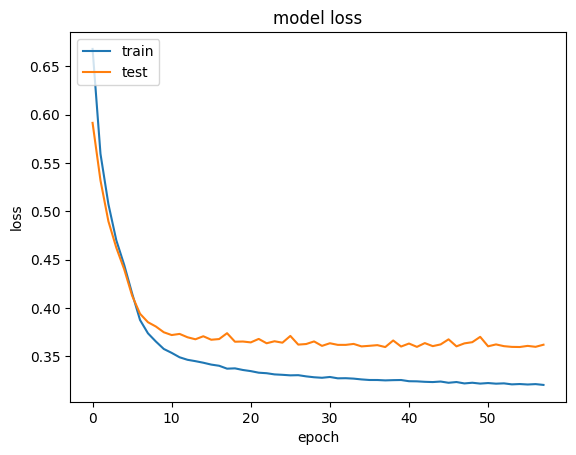

In [58]:
## plot for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [59]:
### Making the Prediction and evaluate model

# predicting the test set results
y_pred=classifier.predict(X_test)
y_pred=(y_pred>0.5)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step


In [60]:
## make the confusion metrix
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1507,   88],
       [ 191,  214]])

In [61]:
## calculate the accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8605

In [62]:
## Get the weights
classifier.get_weights()

[array([[-0.12756456, -0.16421026, -0.07492512, -0.1344501 , -0.07850357,
         -0.08033235, -0.29018357, -0.08639304, -0.5020754 , -0.14281328,
          0.28553513],
        [-0.7897394 ,  0.04373108,  0.07498632,  0.12513256,  0.04671887,
          1.0702137 , -0.11113265,  0.42815387, -0.22353289,  0.778048  ,
         -0.2761401 ],
        [ 0.14349566,  0.28248867,  0.08099143,  0.08709359,  0.19586548,
          0.02278597, -0.09579012,  0.014287  ,  0.18225345,  0.29756004,
         -0.04937287],
        [ 0.01384606,  0.23032345, -0.07925908,  0.37127036, -0.7515095 ,
         -0.1009764 , -0.0461184 ,  0.12553287, -0.15047996, -0.286209  ,
          0.5458758 ],
        [ 0.42405263, -0.6555789 ,  0.3916399 ,  0.8958672 , -0.8925218 ,
         -0.60854286, -1.0487    , -0.04286822, -0.21714453,  0.01882137,
         -0.5595687 ],
        [-0.00149297, -0.03783069,  0.3509174 , -0.17390081,  0.00971221,
         -0.0199858 , -0.21212907, -0.03752862, -0.38343215,  0.1621592